<center>
<img src="../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в машинное обучение"
<img src="../img/faculty_logo.jpg" height="240" width="240">
## Авторы материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий, магистрант ВМК МГУ Евгений Колмаков
</center>
Материал распространяется на условиях лицензии <a href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-Share Alike 4.0</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# Семинар 12. Дополнительная часть. Обзор пакета Pandas

**Pandas** - это пакет для Python, предоставляющий широкие возможности для анализа данных. С его помощью очень удобно загружать, обрабатывать и анализировать табличные данные. В связке с пакетом Matplotlib появляется возможность удобного визуального анализа таких данных.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Основными структурами данных в Pandas являются классы Series и DataFrame. Первая из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Вторая - это двумерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

In [5]:
# Creating Series object with five elements 
# indexed by first alphabet letters 
s = pd.Series(np.random.randn(5), index = ['a', 'b', 'c', 'd', 'e']) 
print(s)                                                                 

a   -0.307054
b    1.430023
c   -0.106982
d    1.010983
e    2.167422
dtype: float64


In [6]:
# Indexing can be used in two ways: s.Name or s['Name']
print(s.b == s['b']) 

True


In [7]:
s.c = np.nan # Series can contain missing values
print(s)

a   -0.307054
b    1.430023
c         NaN
d    1.010983
e    2.167422
dtype: float64


Series объекты похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.

In [5]:
print('Second element of s is', s[1], '\n')
# Smart indexing
print(s[:3], '\n')
print('There are', len(s[s > 0]), 'positive elements in s\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(s))

Second element of s is 1.38075373543 

a   -0.025832
b    1.380754
c         NaN
dtype: float64 

There are 1 positive elements in s

a    0.974499
b    3.977899
c         NaN
d    0.506390
e    0.778435
dtype: float64


### DataFrame

#### Создание и изменение

Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.

In [8]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,-0.470440,-1.394090,1.015956
o2,2.594656,-1.533102,-0.920582
o3,0.694768,0.924000,0.106523
o4,-0.127446,0.048594,0.033117
o5,-0.450538,-1.003215,0.192751


Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.

In [7]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.435284,a,False
1,0.823299,b,False
2,0.229770,c,False
3,0.080613,d,True
4,0.790995,e,True


Обращение к элементам (или целым кускам фрейма):

In [8]:
print('The element in position 3, B is', df2.at[3, 'B'], '\n')

print(df2.loc[[1, 4], ['A', 'B']])

The element in position 3, B is d 

          A  B
1  0.823299  b
4  0.790995  e


Изменение элементов и добавление новых:

In [9]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.435284,a,False
1,0.823299,b,False
2,0.229770,f,False
3,0.080613,d,True
4,0.790995,e,True


In [10]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.435284,a,False
1,0.823299,b,False
2,0.229770,f,False
3,0.080613,d,True
4,0.790995,e,True
5,3.141500,c,False


In [11]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

,A,B,C
o1,0.312830,-1.829607,-0.579769
o2,0.784778,0.5060808,-0.221142
o3,-0.112163,-0.4427968,0.414719
o4,-0.841797,0.5773631,-0.369350
o5,-0.799883,1.074056,-0.367954
0,0.435284,a,0.000000
1,0.823299,b,0.000000
2,0.229770,f,0.000000
3,0.080613,d,1.000000
4,0.790995,e,1.000000


#### Обработка пропущенных значений

In [12]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,A,B,C
o1,0.312830,-1.829607,-0.579769
o2,NaN,0.506081,-0.221142
o3,-0.112163,-0.442797,0.414719
o4,-0.841797,0.577363,NaN
o5,-0.799883,1.074056,-0.367954


In [13]:
pd.isnull(df1) # Boolean mask of the missing data

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


In [14]:
df1.dropna(how='any') # Delete all rows that have missing data

,A,B,C
o1,0.312830,-1.829607,-0.579769
o3,-0.112163,-0.442797,0.414719
o5,-0.799883,1.074056,-0.367954


In [15]:
df1.fillna(0) # Fill the missing data with 0

,A,B,C
o1,0.312830,-1.829607,-0.579769
o2,0.000000,0.506081,-0.221142
o3,-0.112163,-0.442797,0.414719
o4,-0.841797,0.577363,0.000000
o5,-0.799883,1.074056,-0.367954


#### Чтение из файла и первичный анализ

Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [10]:
df = pd.read_csv('beauty.csv',  sep = ';')

Посмотрим на размер данных и названия признаков.

In [11]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).

In [18]:
df[1250:-5] # Show 4 initial rows of df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1250,4.17,13,0,1,0,0,1,0,10,3
1251,6.81,7,1,1,0,0,0,0,12,3
1252,9.62,21,1,1,0,0,1,0,16,3
1253,1.22,10,0,1,0,1,0,1,5,3
1254,1.79,20,0,1,0,1,1,1,8,3


In [20]:
df.head(4)

Метод describe показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квантили.

In [19]:
df[(df.female > 0) & df.black == 1]['wage'].mean()

5.4958

In [20]:
df[(df.female == 0) & df.black == 0]['wage'].mean()

6.347847165160222

In [23]:
df.wage.describe()

count    1260.000000
mean        6.306690
std         4.660639
min         1.020000
25%         3.707500
50%         5.300000
75%         7.695000
max        77.720000
Name: wage, dtype: float64

DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.

In [20]:
df.sort(columns='wage', ascending = False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


#### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: какова доля людей с хорошим здоровьем среди опрошенных?

In [21]:
df['goodhlth'].mean()

0.9333333333333333

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: какова средняя заработная плата среди женщин?

In [37]:
df[df['female'] != 0]['wage'].mean()

Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет.

In [23]:
df[(df['female'] == 0) & (df['union'] > 0)  
   & (df['exper'] < 10)]['wage'].max()

12.82

Извлечь строки с конкретными номерами можно с помощью метода loc. Это может быть использовано при разбиении выборки на части. Для примера возьмем случайную подвыборку размера 5.

In [24]:
df.loc[np.random.randint(df.shape[0], size = 5)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
111,5.54,7,0,1,0,1,0,1,17,4
81,7.79,25,1,1,0,1,0,1,17,3
88,5.05,5,0,1,0,1,0,1,14,4
1085,4.33,45,0,0,1,0,1,0,5,3
89,6.55,10,0,1,0,1,1,0,16,3


In [25]:
# Applying function to each column. Equivalent to df.mean()
df.apply(np.mean) 

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [39]:
type(df.groupby('looks')) # Grouping by looks
# g.mean()                 # and applying mean to all rows in each group

In [44]:
for new_df in df.groupby('looks'):
    print(new_df[1])
    

In [48]:
df.wage.hist()
plt.show()

#### Визуализация

Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

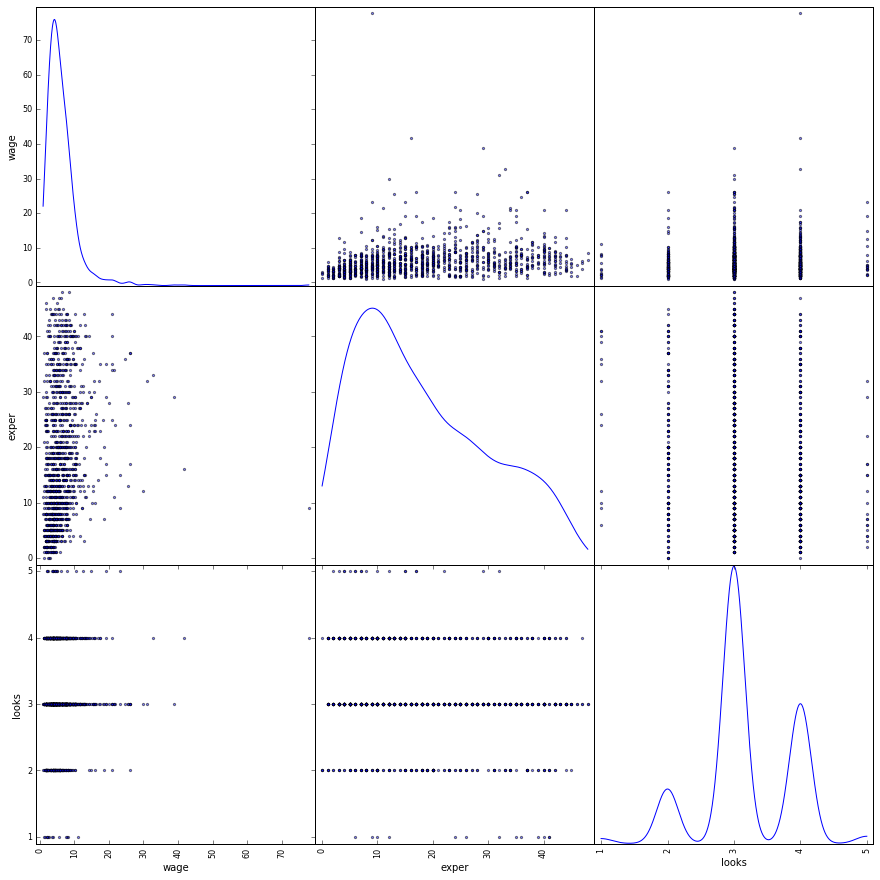

In [25]:
pd.scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], figsize=(15, 15), diagonal='kde')
plt.show()

Для каждого признака можно построить отдельную гистограмму:

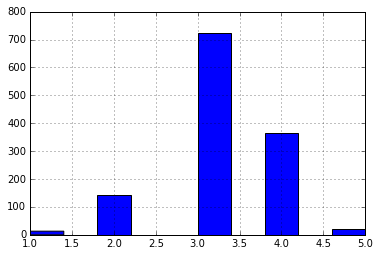

In [26]:
df['looks'].hist()
plt.show()

Или сразу для всех:

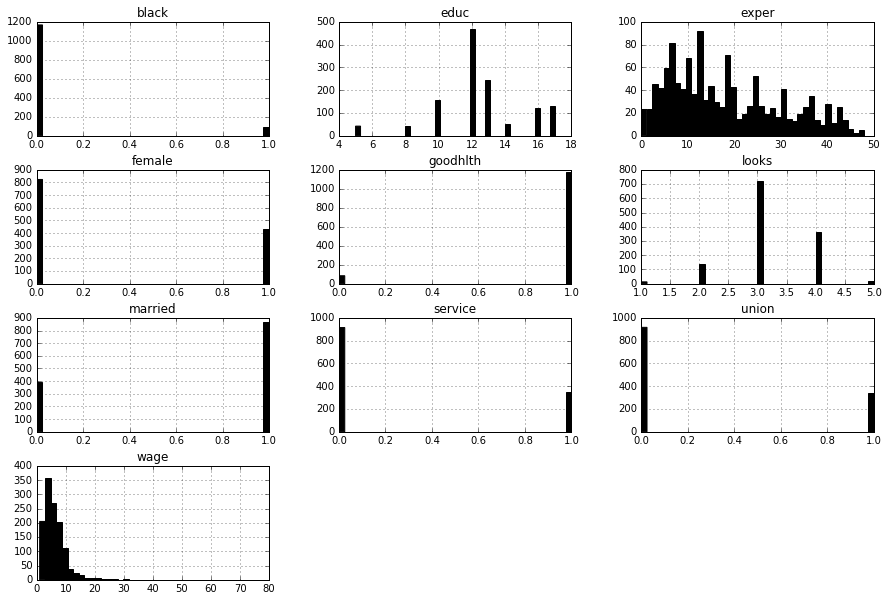

In [29]:
df.hist(color = 'k', bins = 40, figsize=(15,10))
plt.show()

Полезным также является график типа box plot ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

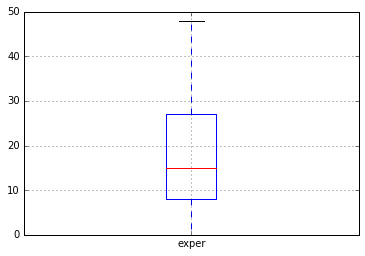

In [30]:
df.boxplot(column='exper')
plt.show()

Можно сделать это, сгруппировав данные по какому-либо другому признаку:

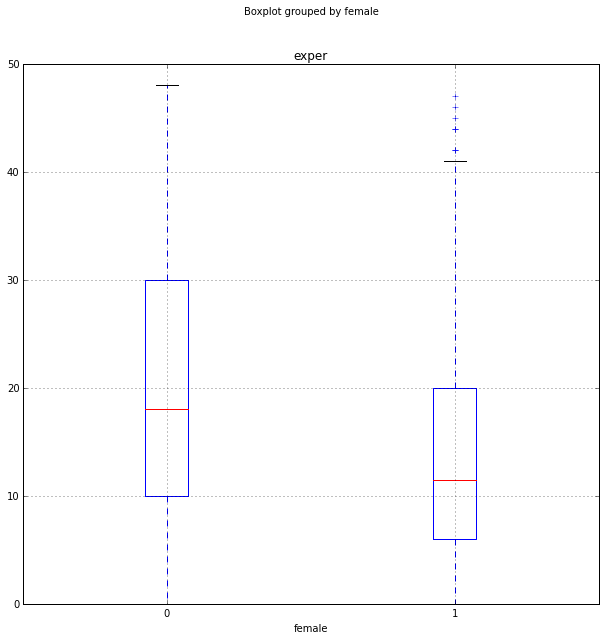

In [32]:
df.boxplot(column='exper',  by='female', figsize=(10,10))
plt.show()

### Ссылки

Множество гайдов и уроков по пакету Pandas представлено на [сайте](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) с документацией.